# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('insurance.csv')
num_rows = df.count()[0]
print("Number of Rows: {}".format(num_rows))
df.head(5)

Number of Rows: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Descriptive Statistics
Find the minimum, maximum, and mean for fields the data captured was numeric

In [2]:
def min_max_values(column):
    
    minimum = df[column].min()
    maximum = df[column].max()
    mean = round(df[column].mean(),2)
    msg = "{}: min - {:.0f}; max - {:.0f}; mean - {:.2f}"
    return msg.format(column, minimum, maximum, mean)

print(min_max_values('age'))
print(min_max_values('bmi'))
print(min_max_values('charges'))
print(min_max_values('children'))

age: min - 18; max - 64; mean - 39.21
bmi: min - 16; max - 53; mean - 30.66
charges: min - 1122; max - 63770; mean - 13270.42
children: min - 0; max - 5; mean - 1.09


In [3]:
def gender_breakdown(df):
    M = 0
    F = 0
    
    for sex in df['sex']:
        if sex == 'male':
            M += 1
        else: F += 1
            
        gender_makeup = [M,F]
        gender_makeup = [round(gender_makeup[i]*100 / sum(gender_makeup), 1) for i in range(len(gender_makeup))]
    return gender_makeup, M, F

In [17]:
def smoker_breakdown(df):
    Y = 0
    N = 0
    
    for smoker in df['smoker']:
        if smoker == "yes":
            Y += 1
        else: N += 1
    
    smoker_makeup = [Y,N]
    smoker_makeup = [round(smoker_makeup[i]*100 / sum(smoker_makeup), 1) for i in range(len(smoker_makeup))]
    return smoker_makeup, Y, N

### Distributions

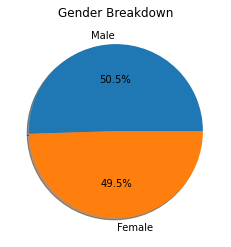

There are 676 males and 662 females in this data set


In [18]:
gender_dist, M, F = gender_breakdown(df)
region_labels = ["Male", "Female"]
plt.title("Gender Breakdown")
plt.pie(gender_dist, autopct='%.1f%%', radius = 1, shadow=True, labels=region_labels)
plt.show()
print("There are {} males and {} females in this data set".format(M,F))

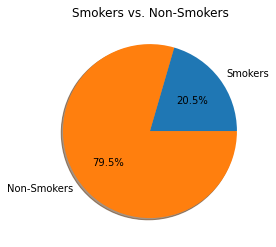

274 people in the Insurance dataset are smokers. 1064 are non-smokers


In [21]:
smokers, Y, N = smoker_breakdown(df)
region_labels = ["Smokers", "Non-Smokers"]
plt.title("Smokers vs. Non-Smokers")
plt.pie(smokers, autopct='%.1f%%', radius = 1, shadow=True, labels=region_labels)
plt.show()
print("{} people in the Insurance dataset are smokers. {} are non-smokers".format(Y,N))

In [5]:
def region_spread(df):
    regions = [0,0,0,0]
    
    for region in df['region']:
        if region == 'northeast':
            regions[0] += 1
        elif region == 'northwest':
            regions[1] += 1
        elif region == 'southwest':
            regions[2] += 1  
        elif region == 'southeast':
            regions[3] += 1
            
    population_pct = [round(regions[i]*100 / sum(regions) , 1) for i in range(len(regions))]
    return population_pct

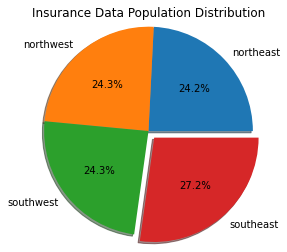

In [6]:
region_labels = ["northeast","northwest","southwest","southeast"]
plt.title('Insurance Data Population Distribution')
plt.pie(region_spread(df), autopct='%.1f%%', radius = 1.2,
    explode = (0,0,0,0.1),shadow=True,labels=region_labels)
plt.show()

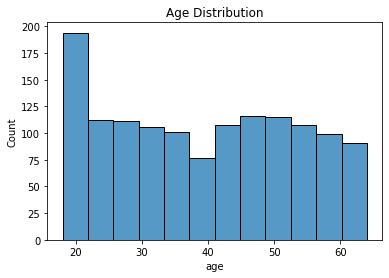

In [9]:
plt.title("Age Distribution")
sns.histplot(df['age'])
plt.show()

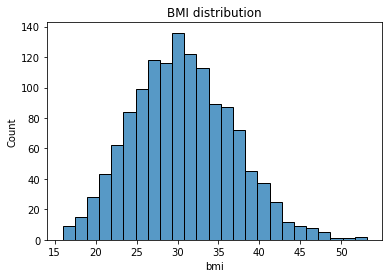

In [8]:
plt.title("BMI Distribution")
sns.histplot(df['bmi'])
plt.show()

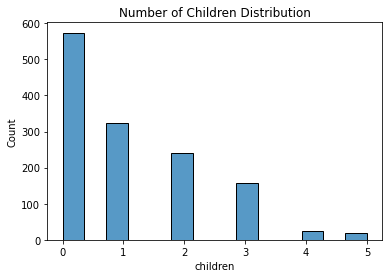

In [10]:
plt.title("Number of Children Distribution")
sns.histplot(df['children'])
plt.show()

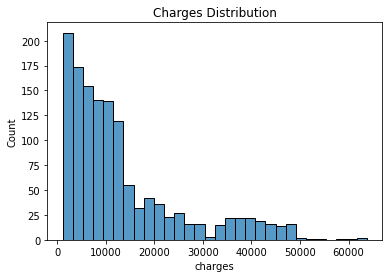

In [14]:
plt.title("Charges Distribution")
sns.histplot(df['charges'])
plt.show()

### Breaking Data into Subgroups
This will help us see how different characteristics affect the price of insurance cost

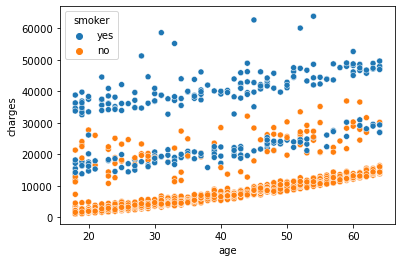

In [40]:
sns.scatterplot(x = df.age,y = df.charges, hue = df.smoker)
plt.show()

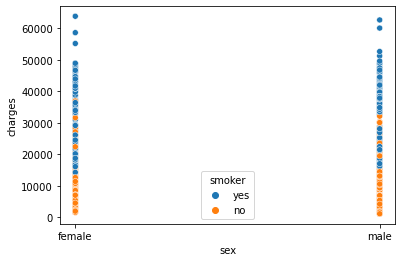

In [37]:
sns.scatterplot(x = df.sex,y = df.charges, hue = df.smoker)
plt.show()

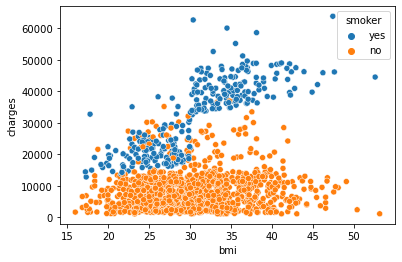

In [38]:
sns.scatterplot(x = df.bmi,y = df.charges, hue = df.smoker)
plt.show()

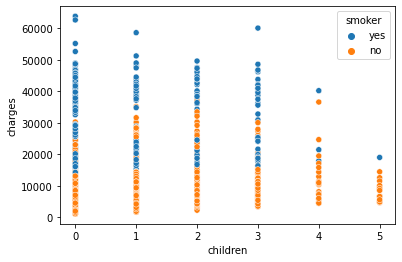

In [41]:
sns.scatterplot(x = df.children,y = df.charges, hue = df.smoker)
plt.show()